1.分析北京二手房成交价格分布
2.分析成交量超过一亿的经纪人相关因素

数据预处理的方法

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_list=[]
for i in range(1,8):
    try:
        data=pd.read_csv(r'E:\3cschool\python_shuju_0\fangchan\lianjia{}.csv'.format(i),encoding='gbk')
    except:
        data=pd.read_csv(r'E:\3cschool\python_shuju_0\fangchan\lianjia{}.csv'.format(i))
    data_list.append(data)

In [3]:
len(data_list)

7

In [4]:
data_list[2].head(2)

,cjtaoshu,mendian,cjzongjia,zhiwei,haoping,cjdanjia,cjxiaoqu,xingming,cjzhouqi,biaoqian,cjlouceng,cjshijian,congyenianxian,bankuai
0,37,红莲北里店,251.0,店经理,97% 141,43997元/平,红莲北里 3室1厅 57平,郭海龙,36.0,房东信赖;销售达人;带看活跃,南 北/高楼层/6层,签约时间：2015-05-24,4-5年,马连道
1,37,红莲北里店,159.0,店经理,97% 141,36969元/平,红莲南里 1室1厅 43平,郭海龙,36.0,房东信赖;销售达人;带看活跃,南/高楼层/7层,签约时间：2015-05-10,4-5年,马连道


In [5]:
data_list[6].head(2)

,cjtaoshu,mendian,cjzongjia,zhiwei,haoping,cjdanjia,cjxiaoqu,xingming,cjzhouqi,biaoqian,cjlouceng,cjshijian,congyenianxian,bankuai
0,37,红莲北里店,251.0,店经理,97% 141,43997元/平,红莲北里 3室1厅 57平,郭海龙,36.0,房东信赖;销售达人;带看活跃,南 北/高楼层/6层,签约时间：2015-05-24,4-5年,马连道
1,37,红莲北里店,159.0,店经理,97% 141,36969元/平,红莲南里 1室1厅 43平,郭海龙,36.0,房东信赖;销售达人;带看活跃,南/高楼层/7层,签约时间：2015-05-10,4-5年,马连道


In [6]:
data=pd.concat(data_list) #合并

In [7]:
data.describe()

,cjtaoshu,cjzongjia,cjzhouqi
count,10899.000000,10892.000000,10892.000000
mean,54.841362,328.791583,47.701157
std,23.379474,189.839121,13.801458
min,18.000000,0.000000,19.000000
25%,37.000000,200.000000,40.000000
50%,48.000000,282.750000,45.000000
75%,71.000000,405.000000,55.000000
max,118.000000,1560.000000,80.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10899 entries, 0 to 1556
Data columns (total 14 columns):
cjtaoshu          10899 non-null int64
mendian           10892 non-null object
cjzongjia         10892 non-null float64
zhiwei            10892 non-null object
haoping           10892 non-null object
cjdanjia          10892 non-null object
cjxiaoqu          10892 non-null object
xingming          10892 non-null object
cjzhouqi          10892 non-null float64
biaoqian          10892 non-null object
cjlouceng         10892 non-null object
cjshijian         10892 non-null object
congyenianxian    10892 non-null object
bankuai           10892 non-null object
dtypes: float64(2), int64(1), object(11)
memory usage: 1.2+ MB


In [9]:
data.head(2)

,cjtaoshu,mendian,cjzongjia,zhiwei,haoping,cjdanjia,cjxiaoqu,xingming,cjzhouqi,biaoqian,cjlouceng,cjshijian,congyenianxian,bankuai
0,37,红莲北里店,251.0,店经理,97% 141,43997元/平,红莲北里 3室1厅 57平,郭海龙,36.0,房东信赖;销售达人;带看活跃,南 北/高楼层/6层,签约时间：2015-05-24,4-5年,马连道
1,37,红莲北里店,159.0,店经理,97% 141,36969元/平,红莲南里 1室1厅 43平,郭海龙,36.0,房东信赖;销售达人;带看活跃,南/高楼层/7层,签约时间：2015-05-10,4-5年,马连道


线性回归应用：根据给出的小区/面积/房子布局/楼层/位置等估算出价格

In [10]:
data=data[['cjdanjia','cjxiaoqu','cjlouceng','bankuai']] #取出要分析的data

In [11]:
data.head(3)

,cjdanjia,cjxiaoqu,cjlouceng,bankuai
0,43997元/平,红莲北里 3室1厅 57平,南 北/高楼层/6层,马连道
1,36969元/平,红莲南里 1室1厅 43平,南/高楼层/7层,马连道
2,39046元/平,常青藤嘉园 1室1厅 65平,北/低楼层/16层,马连道


In [12]:
#预处理单价

缺失值

In [13]:
(data.isnull()).sum()

cjdanjia     7
cjxiaoqu     7
cjlouceng    7
bankuai      7
dtype: int64

In [14]:
data[data.cjdanjia.isnull()]

,cjdanjia,cjxiaoqu,cjlouceng,bankuai
1556,NaN,NaN,NaN,NaN
1556,NaN,NaN,NaN,NaN
1556,NaN,NaN,NaN,NaN
1556,NaN,NaN,NaN,NaN
1556,NaN,NaN,NaN,NaN
1556,NaN,NaN,NaN,NaN
1556,NaN,NaN,NaN,NaN


In [15]:
data=data.dropna(how='all')

In [16]:
data.isnull().sum()

cjdanjia     0
cjxiaoqu     0
cjlouceng    0
bankuai      0
dtype: int64

重复值

In [17]:
data.duplicated().sum()

9339

In [18]:
data.sort_values(by='bankuai',inplace=True)

In [19]:
data.drop_duplicates(subset=['cjdanjia','cjxiaoqu','cjlouceng'],inplace=True)

In [20]:
data.duplicated().sum()

0

数据类型转换、异常值处理和数据离散化分析

In [21]:
#cjdanjia 转化成int类型，万元为单位

In [22]:
(~data.cjdanjia.str.contains('元/平')).sum()  #通过不包含元/平的个数，判断单价是否都包含元/平

0

In [32]:
data['cjdanjia']=data.cjdanjia.str.replace('元/平','').astype(np.float32).map(lambda x:round( x/10000,2))
# 或np.round(data.cjdanjia.str.replace('元/平','').astype(np.float32).map(lambda x: x/10000),2)

In [34]:
data.head(3)

,cjdanjia,cjxiaoqu,cjlouceng,bankuai
714,3.02,华龙美树 2室2厅 109平,南 北/高楼层/17层,东坝
716,2.90,北京像素北区 2室1厅 58平,东北/中楼层/14层,东坝
717,3.23,定福庄南里1号院 3室1厅 75平,南 北/低楼层/6层,东坝


In [35]:
data.cjdanjia.max()

11.52

In [36]:
data.cjdanjia.min()  #异常

0.0

In [38]:
data=data[data.cjdanjia>0]

In [39]:
data.cjdanjia.min()

0.01

In [40]:
data=data[data.cjdanjia>0.5] #考虑实际，设定单价最小5000元

In [41]:
data.cjdanjia.min()

0.54

In [42]:
len(data)

1531

单价分布情况（离散化）

In [48]:
bins=[0,1,2,3,4,5,7,10,15]
pd.cut(data.cjdanjia,bins=bins).value_counts()

(3, 4]      459
(2, 3]      337
(4, 5]      286
(5, 7]      269
(7, 10]      97
(1, 2]       60
(10, 15]     13
(0, 1]       10
Name: cjdanjia, dtype: int64

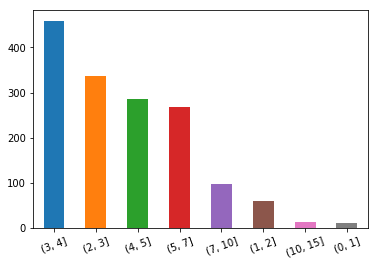

In [50]:
pd.cut(data.cjdanjia,bins=bins).value_counts().plot.bar(rot=20)

字符串处理

In [51]:
data.head(2)

,cjdanjia,cjxiaoqu,cjlouceng,bankuai
714,3.02,华龙美树 2室2厅 109平,南 北/高楼层/17层,东坝
716,2.90,北京像素北区 2室1厅 58平,东北/中楼层/14层,东坝


In [54]:
data.cjlouceng.str.split('/')

714       [南 北, 高楼层, 17层]
716        [东北, 中楼层, 14层]
717        [南 北, 低楼层, 6层]
718       [南 北, 高楼层, 18层]
719       [南 北, 中楼层, 21层]
720          [南, 地下室, 0层]
721        [南 北, 高楼层, 6层]
722        [南 北, 低楼层, 9层]
715       [南 北, 低楼层, 11层]
723        [南 北, 低楼层, 6层]
725        [西北, 高楼层, 18层]
726         [南, 低楼层, 20层]
727       [南 西, 低楼层, 26层]
728         [南, 地下室, 18层]
729       [南 北, 低楼层, 18层]
730       [南 北, 中楼层, 18层]
731          [南, 中楼层, 6层]
724        [西北, 中楼层, 13层]
732        [南 北, 低楼层, 6层]
712       [东 西, 中楼层, 10层]
713      [北 东南, 低楼层, 21层]
700        [南 北, 高楼层, 6层]
701          [西, 高楼层, 6层]
702        [南 北, 中楼层, 6层]
703     [西南 东北, 低楼层, 21层]
705       [南 北, 高楼层, 15层]
706        [南 北, 低楼层, 6层]
707         [南, 低楼层, 18层]
708        [南 北, 低楼层, 6层]
709        [南 北, 低楼层, 6层]
              ...        
1227        [南, 低楼层, 16层]
1228       [东 西, 低楼层, 6层]
1229       [南 北, 高楼层, 6层]
1230       [东 西, 高楼层, 6层]
1231        [西, 中楼层, 15层]
1232       [南 北, 高楼层, 6层]
1207       [南 北, 中楼层, 6层]
1209        

In [57]:
(data.cjlouceng.str.split('/').map(len)!=3).sum()  #判断cjlouceng是否都有两个/

0

In [69]:
data.cjlouceng.map(lambda x: x.split('/')[0])
#或data.cjlouceng.str.split('/').map(lambda x: x[0])

714       南 北
716        东北
717       南 北
718       南 北
719       南 北
720         南
721       南 北
722       南 北
715       南 北
723       南 北
725        西北
726         南
727       南 西
728         南
729       南 北
730       南 北
731         南
724        西北
732       南 北
712       东 西
713      北 东南
700       南 北
701         西
702       南 北
703     西南 东北
705       南 北
706       南 北
707         南
708       南 北
709       南 北
        ...  
1227        南
1228      东 西
1229      南 北
1230      东 西
1231        西
1232      南 北
1207      南 北
1209        南
542        西南
541       南 西
540        西南
539       南 西
538       南 北
1208      南 北
1224        南
1210      东 北
1211      南 北
1212      东 南
1213        西
1214      东 西
1215        南
1225        东
1216      南 北
1218      南 西
1219       西北
1220      东 西
1221        南
1222       西南
1223      南 北
1217        南
Name: cjlouceng, Length: 1531, dtype: object

In [75]:
data=data.assign(chaoxiang=data.cjlouceng.map(lambda x: x.split('/')[0])) #增加朝向列
data=data.assign(louceng=data.cjlouceng.map(lambda x: x.split('/')[1]))

In [76]:
data.head(2)

,cjdanjia,cjxiaoqu,cjlouceng,bankuai,chaoxiang,louceng
714,3.02,华龙美树 2室2厅 109平,南 北/高楼层/17层,东坝,南 北,高楼层
716,2.90,北京像素北区 2室1厅 58平,东北/中楼层/14层,东坝,东北,中楼层


In [77]:
data.louceng.unique()

array(['高楼层', '中楼层', '低楼层', '地下室'], dtype=object)

In [79]:
pd.get_dummies(data.louceng)

,中楼层,低楼层,地下室,高楼层
714,0,0,0,1
716,1,0,0,0
717,0,1,0,0
718,0,0,0,1
719,1,0,0,0
720,0,0,1,0
721,0,0,0,1
722,0,1,0,0
715,0,1,0,0
723,0,1,0,0


In [80]:
data.join(pd.get_dummies(data.louceng)) #将楼层量化

,cjdanjia,cjxiaoqu,cjlouceng,bankuai,chaoxiang,louceng,中楼层,低楼层,地下室,高楼层
714,3.02,华龙美树 2室2厅 109平,南 北/高楼层/17层,东坝,南 北,高楼层,0,0,0,1
716,2.90,北京像素北区 2室1厅 58平,东北/中楼层/14层,东坝,东北,中楼层,1,0,0,0
717,3.23,定福庄南里1号院 3室1厅 75平,南 北/低楼层/6层,东坝,南 北,低楼层,0,1,0,0
718,2.42,定福家园2号院 3室1厅 112平,南 北/高楼层/18层,东坝,南 北,高楼层,0,0,0,1
719,2.46,定福家园2号院 3室2厅 119平,南 北/中楼层/21层,东坝,南 北,中楼层,1,0,0,0
720,1.02,首开常青藤一期 1室--厅 29平,南/地下室/0层,东坝,南,地下室,0,0,1,0
721,7.17,首开常青藤一期 2室2厅 83平,南 北/高楼层/6层,东坝,南 北,高楼层,0,0,0,1
722,5.20,首开常青藤一期 3室2厅 152平,南 北/低楼层/9层,东坝,南 北,低楼层,0,1,0,0
715,2.44,天泰苑A8区 3室1厅 120平,南 北/低楼层/11层,东坝,南 北,低楼层,0,1,0,0
723,5.54,首开常青藤四期 3室3厅 157平,南 北/低楼层/6层,东坝,南 北,低楼层,0,1,0,0


In [81]:
data.chaoxiang.unique()  #也可根据先split(' ') 切片，分成8个方位，再用pd.get_dummies()量化

array(['南 北', '东北', '南', '西北', '南 西', '东 西', '北 东南', '西', '西南 东北', '东 南',
       '北', '西 南', '西 北', '西南', '东', '东南', '南 西 北', '东 南 北', '南 北 东北',
       '东 北', '暂无数据', '北 西南', '东 西南', '西 南 北', '东 南 西', '东 西 北', '南 东北',
       '南 北 西', '东 南 西 北', '南 北 东'], dtype=object)

分组运算、布尔过滤与透视表